# High Severity Traffic Crashes Analytics
## DAB 103 - Semester 1 Project (Fall 2021)
### By Group 7

Dataset Link: https://data.world/city-of-tempe/7556b322-1b7d-4f65-87b8-598d11ef

## Imports

In [ ]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [ ]:
df = pd.read_csv("crash-data-1.csv")
df

,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,2579417,1/10/12 9:04,2012,Baseline Rd,Price Rd,-24.816,Intersection Related Interchange,0,0,No Injury,Rear End,Daylight,Clear,Dry,Driver,43.0,Male,East,Going Straight Ahead,Inattention Distraction,No Apparent Influence,No Apparent Influence,Driver,62.0,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378452,-111.892579
1,2582044,1/5/12 17:24,2012,Rural Rd,Playa Del Norte,-796.224,Not Junction Related,0,0,No Injury,Rear End,Dusk,Clear,Dry,Driver,19.0,Male,North,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,28.0,Male,North,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.431845,-111.926262
2,2582996,1/16/12 19:08,2012,Rio Salado Pkwy,State Route 101 Exit 51 J-Ramp,0.000,Intersection Interchange,0,0,No Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,26.0,Male,North,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,Driver,24.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.429308,-111.890254
3,2584311,1/27/12 14:41,2012,Rio Salado Pkwy,State Route 101 Exit 51 J-Ramp,76.032,Not Junction Related,1,0,Possible Injury,Rear End,Daylight,Cloudy,Dry,Driver,29.0,Male,West,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,18.0,Female,West,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.429312,-111.890006
4,2584437,1/10/12 13:41,2012,Scottsdale Rd,State Route 202 Exit 7 P-Ramp,-40.128,Entrance Exit Ramp Interchange,0,0,No Injury,Rear End,Daylight,Clear,Dry,Driver,255.0,NaN,North,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,26.0,Male,North,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.435329,-111.926245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28834,3392584,4/13/18 14:17,2018,University Dr,Mill Ave,220.176,Not Junction Related,0,0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,NaN,NaN,Southeast,Making Left Turn,NaN,NaN,NaN,Driver,NaN,NaN,West,Stopped In Trafficway,NaN,NaN,NaN,33.421935,-111.939286
28835,3392585,4/26/18 17:14,2018,Apache Blvd,Mcallister Ave,80.256,Not Junction Related,0,0,No Injury,Sideswipe Same Direction,Daylight,Clear,Dry,Driver,NaN,NaN,East,Changing Lanes,NaN,NaN,NaN,Driver,NaN,NaN,East,Going Straight Ahead,NaN,NaN,NaN,33.414721,-111.930397
28836,3393423,4/22/18 14:40,2018,University Dr,Rural Rd,500.016,Not Junction Related,1,0,Non Incapacitating Injury,Other,Daylight,Clear,Dry,Pedalcyclist,NaN,NaN,West,Going Straight Ahead,NaN,NaN,NaN,Driver,NaN,NaN,North,Going Straight Ahead,NaN,NaN,NaN,33.422022,-111.924663
28837,3393911,3/14/18 16:17,2018,Rural Rd,Ray Rd,1320.000,Not Junction Related,0,0,No Injury,Sideswipe Same Direction,Daylight,Clear,Dry,Driver,NaN,NaN,North,Overtaking Passing,NaN,NaN,NaN,Driver,NaN,NaN,North,Going Straight Ahead,NaN,NaN,NaN,33.323628,-111.928225


## Summarize Data

In [ ]:
df.head()

,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,2579417,1/10/12 9:04,2012,Baseline Rd,Price Rd,-24.816,Intersection Related Interchange,0,0,No Injury,Rear End,Daylight,Clear,Dry,Driver,43.0,Male,East,Going Straight Ahead,Inattention Distraction,No Apparent Influence,No Apparent Influence,Driver,62.0,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378452,-111.892579
1,2582044,1/5/12 17:24,2012,Rural Rd,Playa Del Norte,-796.224,Not Junction Related,0,0,No Injury,Rear End,Dusk,Clear,Dry,Driver,19.0,Male,North,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,28.0,Male,North,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.431845,-111.926262
2,2582996,1/16/12 19:08,2012,Rio Salado Pkwy,State Route 101 Exit 51 J-Ramp,0.000,Intersection Interchange,0,0,No Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,26.0,Male,North,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,Driver,24.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.429308,-111.890254
3,2584311,1/27/12 14:41,2012,Rio Salado Pkwy,State Route 101 Exit 51 J-Ramp,76.032,Not Junction Related,1,0,Possible Injury,Rear End,Daylight,Cloudy,Dry,Driver,29.0,Male,West,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,18.0,Female,West,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.429312,-111.890006
4,2584437,1/10/12 13:41,2012,Scottsdale Rd,State Route 202 Exit 7 P-Ramp,-40.128,Entrance Exit Ramp Interchange,0,0,No Injury,Rear End,Daylight,Clear,Dry,Driver,255.0,NaN,North,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,26.0,Male,North,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.435329,-111.926245


In [ ]:
df.tail()

,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
28834,3392584,4/13/18 14:17,2018,University Dr,Mill Ave,220.176,Not Junction Related,0,0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,NaN,NaN,Southeast,Making Left Turn,NaN,NaN,NaN,Driver,NaN,NaN,West,Stopped In Trafficway,NaN,NaN,NaN,33.421935,-111.939286
28835,3392585,4/26/18 17:14,2018,Apache Blvd,Mcallister Ave,80.256,Not Junction Related,0,0,No Injury,Sideswipe Same Direction,Daylight,Clear,Dry,Driver,NaN,NaN,East,Changing Lanes,NaN,NaN,NaN,Driver,NaN,NaN,East,Going Straight Ahead,NaN,NaN,NaN,33.414721,-111.930397
28836,3393423,4/22/18 14:40,2018,University Dr,Rural Rd,500.016,Not Junction Related,1,0,Non Incapacitating Injury,Other,Daylight,Clear,Dry,Pedalcyclist,NaN,NaN,West,Going Straight Ahead,NaN,NaN,NaN,Driver,NaN,NaN,North,Going Straight Ahead,NaN,NaN,NaN,33.422022,-111.924663
28837,3393911,3/14/18 16:17,2018,Rural Rd,Ray Rd,1320.000,Not Junction Related,0,0,No Injury,Sideswipe Same Direction,Daylight,Clear,Dry,Driver,NaN,NaN,North,Overtaking Passing,NaN,NaN,NaN,Driver,NaN,NaN,North,Going Straight Ahead,NaN,NaN,NaN,33.323628,-111.928225
28838,3399796,3/17/18 3:52,2018,Mill Ave,Project Dr,-1056.000,Not Junction Related,1,0,Possible Injury,Rear End,Dark Not Lighted,Clear,Dry,Driver,NaN,NaN,South,Stopped In Trafficway,NaN,NaN,NaN,Driver,NaN,NaN,South,Going Straight Ahead,NaN,NaN,NaN,33.446175,-111.949976


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20669 entries, 0 to 20668
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Incidentid           20669 non-null  int64  
 1   DateTime             20669 non-null  object 
 2   Year                 20669 non-null  int64  
 3   StreetName           20669 non-null  object 
 4   CrossStreet          20472 non-null  object 
 5   Distance             20669 non-null  float64
 6   JunctionRelation     20669 non-null  object 
 7   Totalinjuries        20669 non-null  int64  
 8   Totalfatalities      20669 non-null  int64  
 9   Injuryseverity       20669 non-null  object 
 10  Collisionmanner      20669 non-null  object 
 11  Lightcondition       20669 non-null  object 
 12  Weather              20668 non-null  object 
 13  SurfaceCondition     20668 non-null  object 
 14  Unittype_One         20668 non-null  object 
 15  Age_Drv1             20646 non-null 

In [ ]:
df.describe()

,Incidentid,Year,Distance,Totalinjuries,Totalfatalities,Age_Drv1,Age_Drv2,Latitude,Longitude
count,2.066900e+04,20669.000000,20669.000000,20669.000000,20669.000000,20646.000000,18810.000000,20355.000000,20355.000000
mean,2.851646e+06,2013.905414,6.549196,0.413905,0.002032,44.593287,39.003934,33.396986,-111.931854
std,1.572393e+05,1.362036,298.219444,0.760834,0.046095,39.352289,22.156879,0.028692,0.024023
min,2.579417e+06,2012.000000,-5280.000000,0.000000,0.000000,2.000000,2.000000,33.319857,-111.978395
25%,2.709028e+06,2013.000000,-74.976000,0.000000,0.000000,22.000000,24.000000,33.378245,-111.951970
50%,2.844101e+06,2014.000000,0.000000,0.000000,0.000000,31.000000,34.000000,33.406139,-111.928535
75%,2.983264e+06,2015.000000,80.256000,1.000000,0.000000,52.000000,49.000000,33.421890,-111.911162
max,3.145250e+06,2016.000000,5377.152000,9.000000,2.000000,255.000000,255.000000,33.458481,-111.877419


### Shape of the data

In [ ]:
print(f"Rows : {df.shape[0]}")
print(f"Columns : {df.shape[1]}")

Rows : 20669
Columns : 32


### Column Names

In [ ]:
print(f"\nAttributes:\n {df.columns.tolist()}")


Attributes:
 ['Incidentid', 'DateTime', 'Year', 'StreetName', 'CrossStreet', 'Distance', 'JunctionRelation', 'Totalinjuries', 'Totalfatalities', 'Injuryseverity', 'Collisionmanner', 'Lightcondition', 'Weather', 'SurfaceCondition', 'Unittype_One', 'Age_Drv1', 'Gender_Drv1', 'Traveldirection_One', 'Unitaction_One', 'Violation1_Drv1', 'AlcoholUse_Drv1', 'DrugUse_Drv1', 'Unittype_Two', 'Age_Drv2', 'Gender_Drv2', 'Traveldirection_Two', 'Unitaction_Two', 'Violation1_Drv2', 'AlcoholUse_Drv2', 'DrugUse_Drv2', 'Latitude', 'Longitude']


### Percentage of missing values

In [ ]:
## Displaying the number of the missing values

print('Percentage of missing values : \n\n', (100*df.isnull().sum()/df.shape[0]).round(2))

Percentage of missing values : 

 Incidentid             0.00
DateTime               0.00
Year                   0.00
StreetName             0.00
CrossStreet            0.95
Distance               0.00
JunctionRelation       0.00
Totalinjuries          0.00
Totalfatalities        0.00
Injuryseverity         0.00
Collisionmanner        0.00
Lightcondition         0.00
Weather                0.00
SurfaceCondition       0.00
Unittype_One           0.00
Age_Drv1               0.11
Gender_Drv1            1.91
Traveldirection_One    0.00
Unitaction_One         0.00
Violation1_Drv1        0.11
AlcoholUse_Drv1        0.11
DrugUse_Drv1           0.11
Unittype_Two           6.57
Age_Drv2               8.99
Gender_Drv2            9.26
Traveldirection_Two    6.57
Unitaction_Two         6.57
Violation1_Drv2        8.99
AlcoholUse_Drv2        8.99
DrugUse_Drv2           8.99
Latitude               1.52
Longitude              1.52
dtype: float64


### Unique Values per column

In [ ]:
## Displaying unique values per column

print('Unique values per column :\n\n', df.nunique())

Unique values per column :

 Incidentid             20669
DateTime               20470
Year                       5
StreetName               359
CrossStreet              506
Distance                1610
JunctionRelation          21
Totalinjuries             10
Totalfatalities            3
Injuryseverity             5
Collisionmanner           11
Lightcondition             6
Weather                    8
SurfaceCondition           8
Unittype_One               4
Age_Drv1                 100
Gender_Drv1                3
Traveldirection_One       10
Unitaction_One            21
Violation1_Drv1           21
AlcoholUse_Drv1            2
DrugUse_Drv1               2
Unittype_Two               4
Age_Drv2                  98
Gender_Drv2                3
Traveldirection_Two       10
Unitaction_Two            23
Violation1_Drv2           19
AlcoholUse_Drv2            2
DrugUse_Drv2               2
Latitude               14328
Longitude              14327
dtype: int64


### Numerical Columns

In [ ]:
df.select_dtypes(include=['int', 'float']).columns.values.tolist()

['Incidentid',
 'Year',
 'Distance',
 'Totalinjuries',
 'Totalfatalities',
 'Age_Drv1',
 'Age_Drv2',
 'Latitude',
 'Longitude']

### Check for Duplicates

In [ ]:
# Checking for duplicate data

print(f'Percentage of duplicate records: {100-(100*df.drop_duplicates().shape[0]/df.shape[0])}')

Percentage of duplicate records: 0.0


## Basic Exploration (Univariate Analysis)

### Number of events recorded per year

In [80]:
a4_dims = (22, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of events recorded per year')

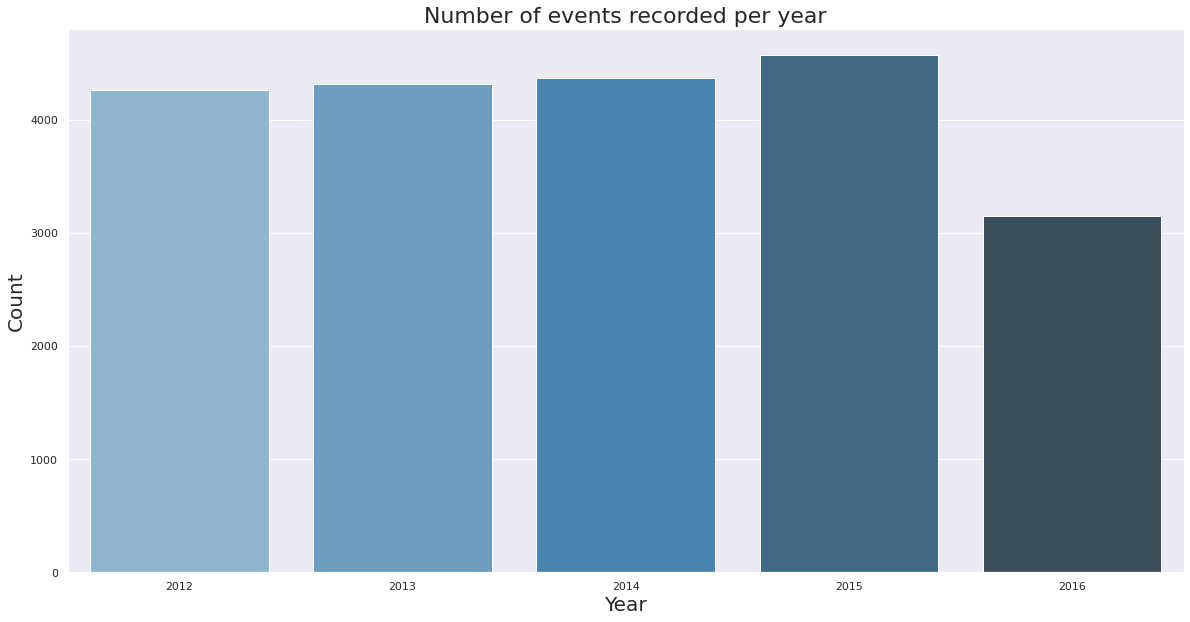

In [ ]:
# fig, ax = plt.subplots(figsize=(a4_dims))
plt.figure(figsize=(20, 10))

p = sns.countplot(df["Year"], palette="Blues_d")
p.set_xlabel("Year", fontsize=20)
p.set_ylabel("Count", fontsize=20)
p.set_title("Number of events recorded per year", fontsize=22)


### Top 10 streets with the most accidents

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


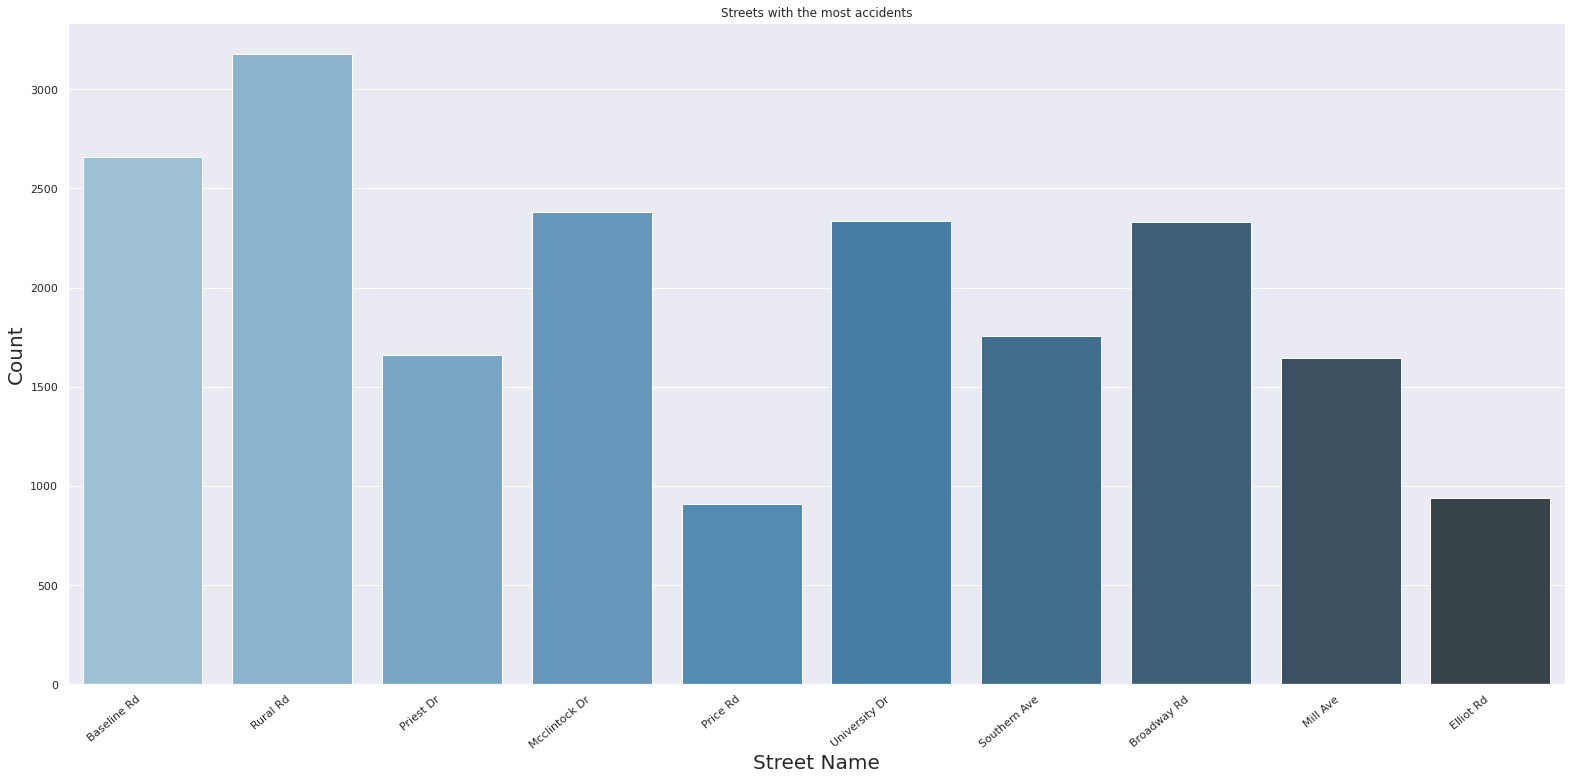

In [119]:
a4_dims = (22, 11)

fig, ax = plt.subplots(figsize=(a4_dims))

temp = df[df.StreetName.isin(df["StreetName"].value_counts().head(10).keys().values.tolist())]

sns.countplot(temp["StreetName"], palette="Blues_d", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Street Name", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title("Streets with the most accidents")
plt.tight_layout()
plt.show()

### LightCondition

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Light conditions during crashes')

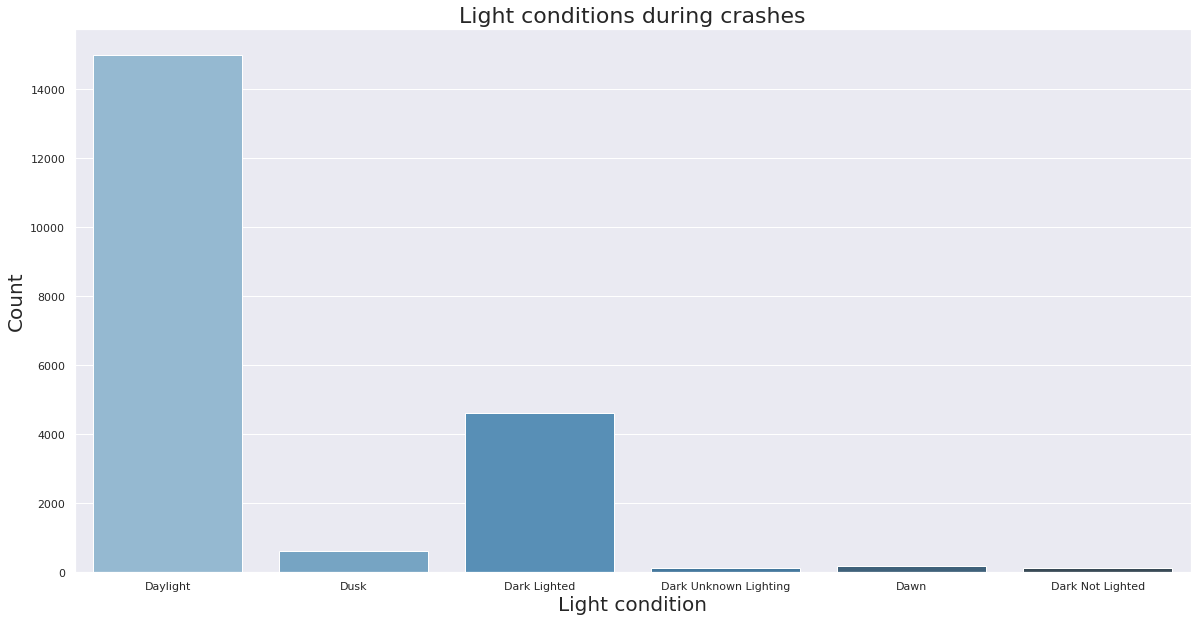

In [ ]:
plt.figure(figsize=(20, 10))

p = sns.countplot(df["Lightcondition"], palette="Blues_d")
p.set_xlabel("Light condition", fontsize=20)
p.set_ylabel("Count", fontsize=20)
p.set_title("Light conditions during crashes", fontsize=22)

### Age distribution

#### Density Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution')

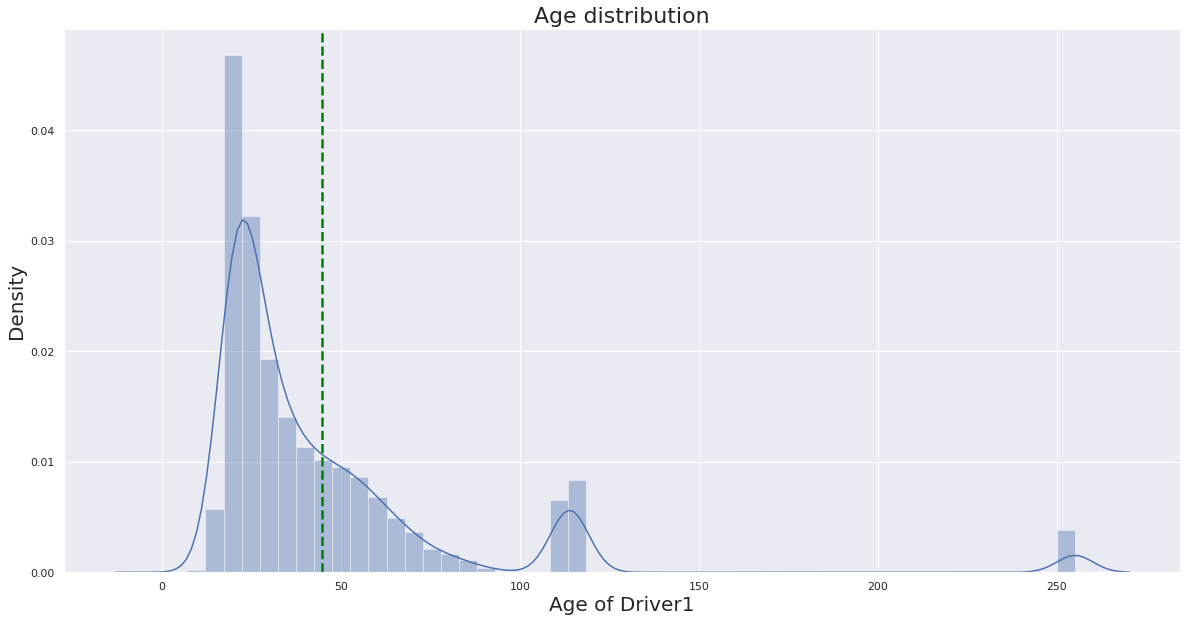

In [ ]:
plt.figure(figsize=(20, 10))

p = sns.distplot(df["Age_Drv1"])
p.set_xlabel("Age of Driver1", fontsize=20)
p.set_ylabel("Density", fontsize=20)
p.axvline(x=df.Age_Drv1.mean(), color="green", ls="--", lw=2.5)
p.set_title("Age distribution", fontsize=22)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution')

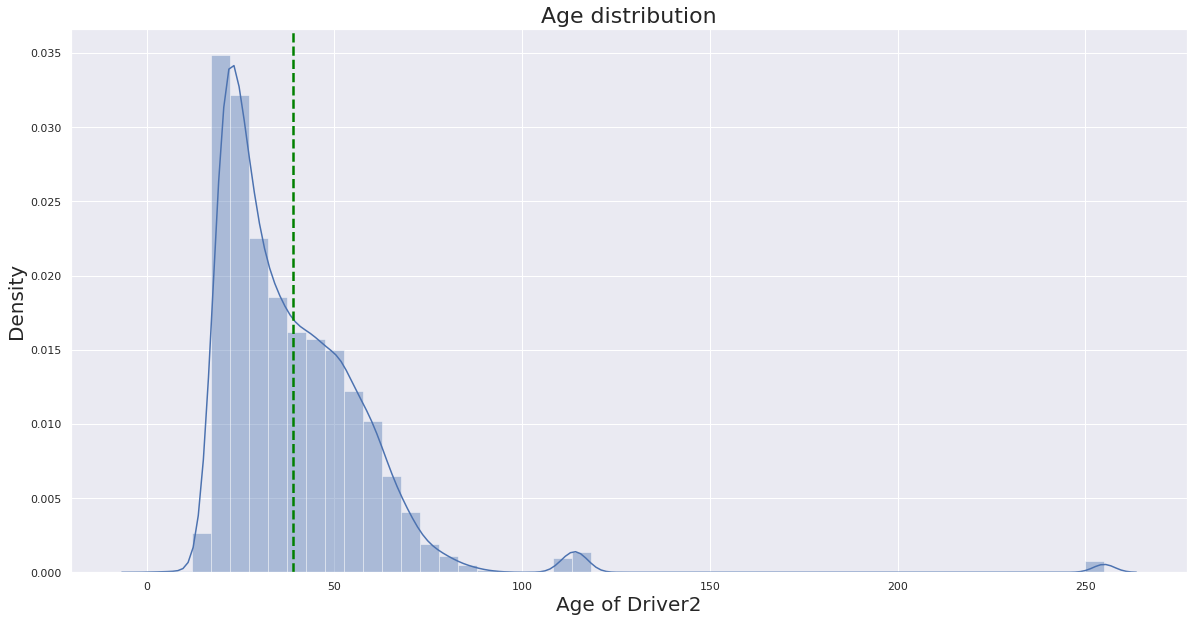

In [ ]:
plt.figure(figsize=(20, 10))

p = sns.distplot(df["Age_Drv2"])
p.set_xlabel("Age of Driver2", fontsize=20)
p.set_ylabel("Density", fontsize=20)
p.axvline(x=df.Age_Drv2.mean(), color="green", ls="--", lw=2.5)
p.set_title("Age distribution", fontsize=22)

#### Box Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Age distribution')

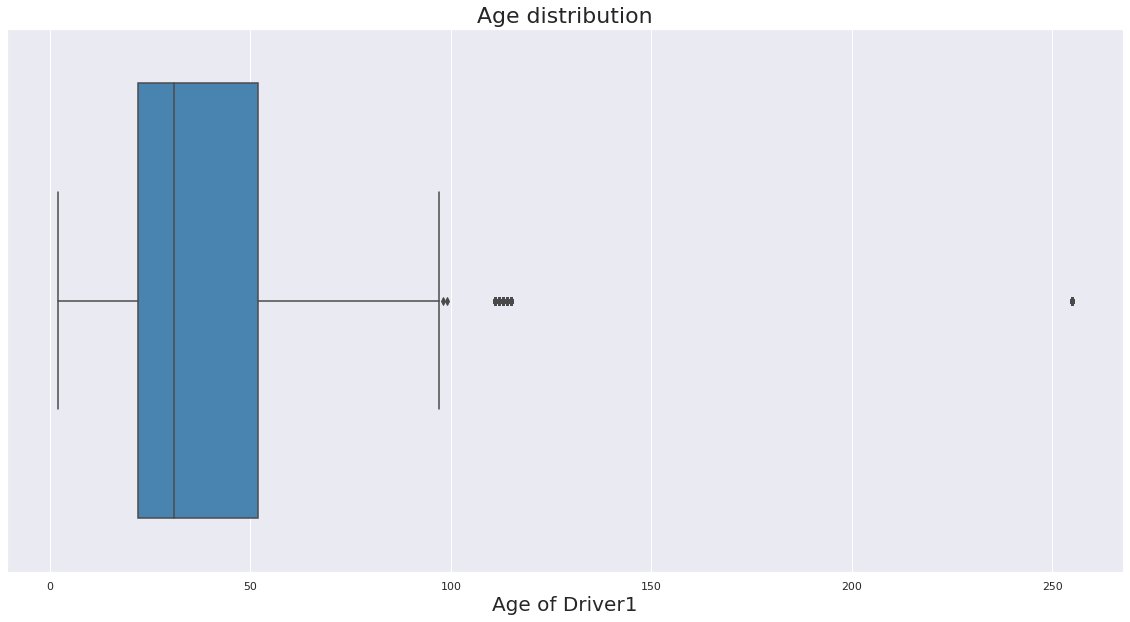

In [ ]:
plt.figure(figsize=(20, 10))

p = sns.boxplot(df["Age_Drv1"], palette="Blues_d")
p.set_xlabel("Age of Driver1", fontsize=20)

p.set_title("Age distribution", fontsize=22)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Age distribution')

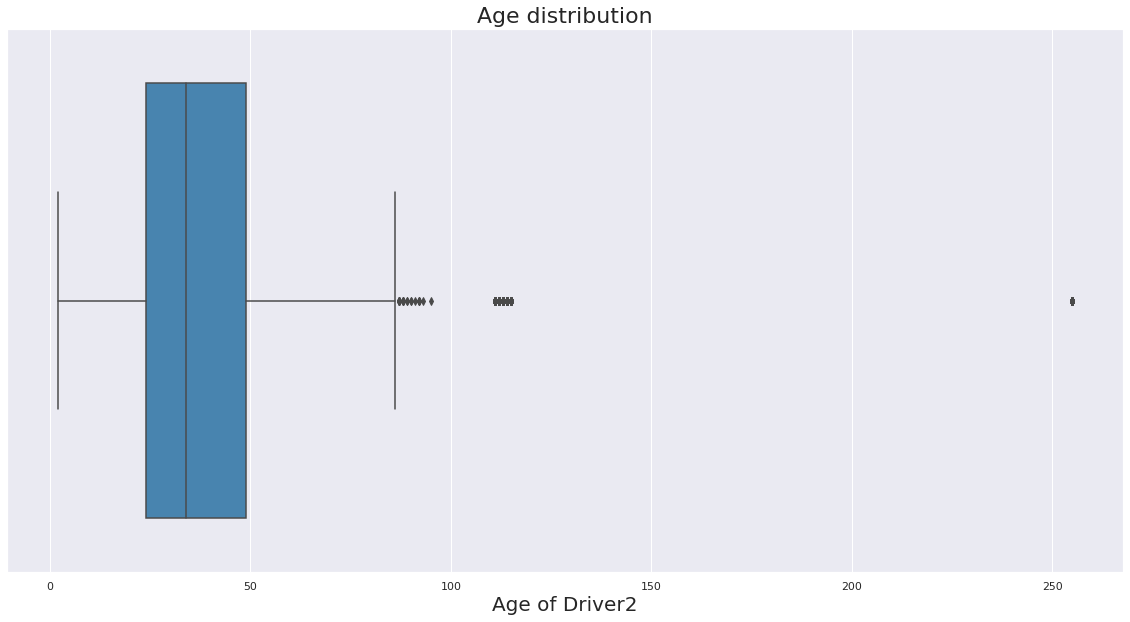

In [ ]:
plt.figure(figsize=(20, 10))

p = sns.boxplot(df["Age_Drv2"], palette="Blues_d")
p.set_xlabel("Age of Driver2", fontsize=20)

p.set_title("Age distribution", fontsize=22)

#### Age distribution of both the Drivers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


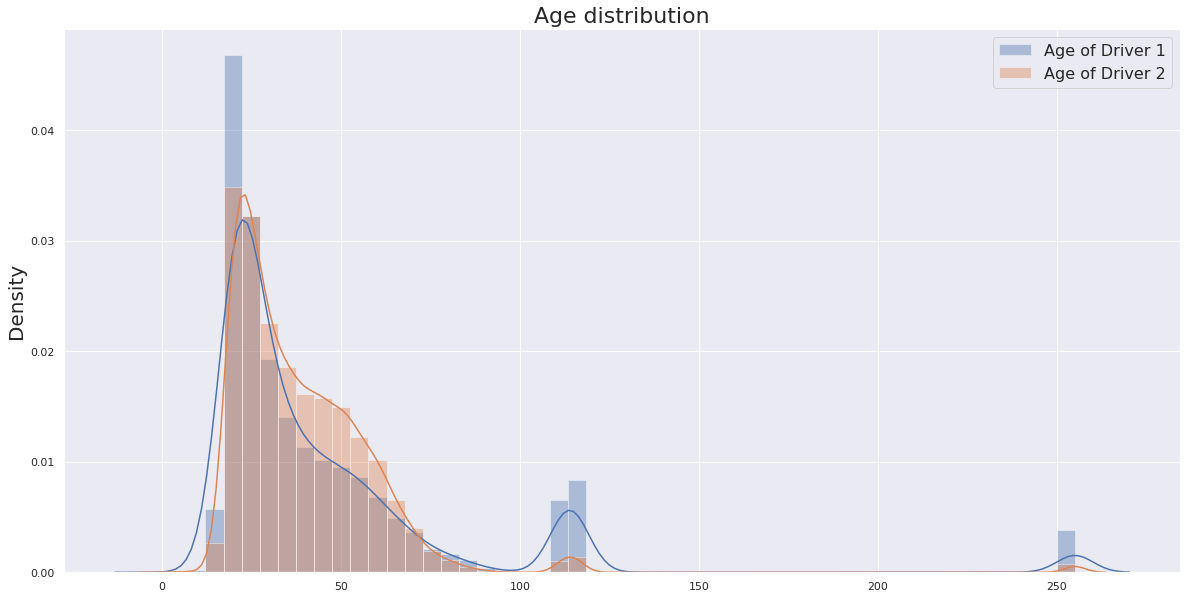

In [107]:
plt.figure(figsize=(20, 10))
# fig, ax = plt.subplots(figsize=(a4_dims))

p1 = sns.distplot(df["Age_Drv1"], label="Age of Driver 1")
p1.set_xlabel("Age of Driver1", fontsize=20)
p1.set_ylabel("Density", fontsize=20)
p1.set_title("Age distribution", fontsize=22)

p2 = sns.distplot(df["Age_Drv2"], label="Age of Driver 2")
p2.set_xlabel("", fontsize=20)
p2.set_ylabel("Density", fontsize=20)
p2.set_title("Age distribution", fontsize=22)

plt.legend(fontsize=16)
plt.show()


### Distribution of Gender

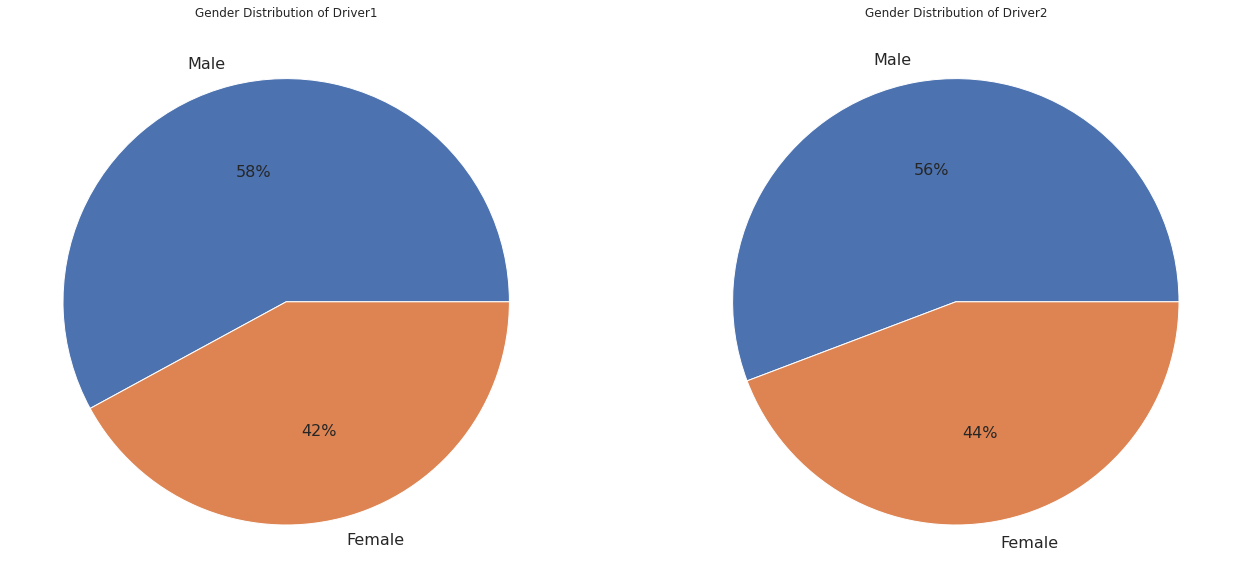

In [89]:
gen_data1 = df.Gender_Drv1.value_counts().values.tolist()[:2]
gen_data2 = df.Gender_Drv2.value_counts().values.tolist()[:2]

labels = ["Male", "Female"]
colors = sns.color_palette('pastel')[:2]

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=a4_dims)

ax1.pie(data, labels=labels, autopct='%.0f%%', textprops={'fontsize': 16})
ax1.set_title("Gender Distribution of Driver1")

ax2.pie(df.Gender_Drv2.value_counts().values.tolist()[:2], labels=labels, autopct='%.0f%%', textprops={'fontsize': 16})
ax2.set_title("Gender Distribution of Driver2")

plt.show()

## Basic Exploration (BiVariate Anaylsis)

### Relation between Age and Number of injuries caused by both the drivers

Text(0.5, 1.0, 'Relation between age and number of injuries caused')

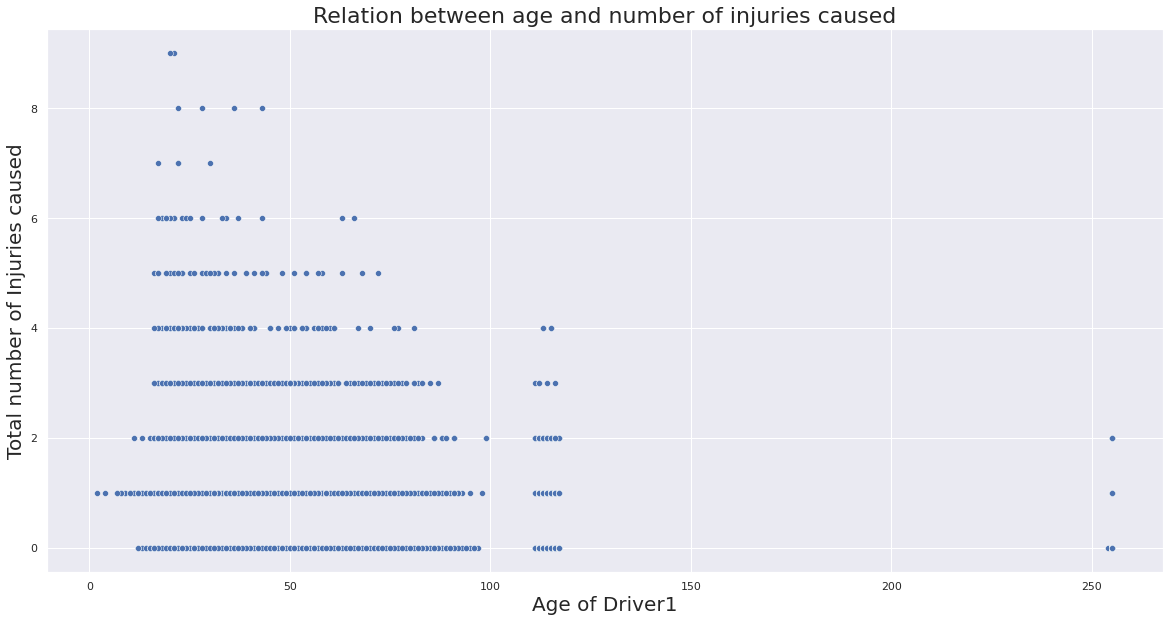

In [95]:
plt.figure(figsize=(20, 10))

p = sns.scatterplot(x=df.Age_Drv1, y=df.Totalinjuries, palette="Blues_d")
p.set_xlabel("Age of Driver1", fontsize=20)
p.set_ylabel("Total number of Injuries caused", fontsize=20)
p.set_title("Relation between age and number of injuries caused", fontsize=22)

Text(0.5, 1.0, 'Relation between age and number of injuries caused')

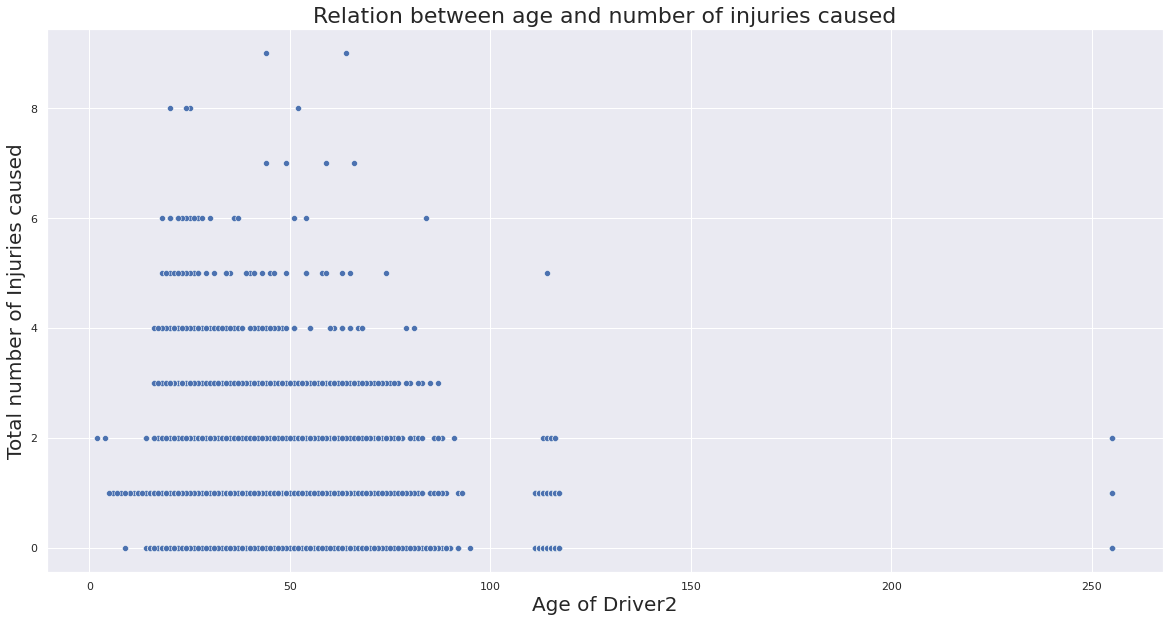

In [96]:
plt.figure(figsize=(20, 10))

p = sns.scatterplot(x=df.Age_Drv2, y=df.Totalinjuries, palette="Blues_d")
p.set_xlabel("Age of Driver2", fontsize=20)
p.set_ylabel("Total number of Injuries caused", fontsize=20)
p.set_title("Relation between age and number of injuries caused", fontsize=22)

#### Box Plots

Text(0.5, 1.0, 'Relation between age and number of injuries caused')

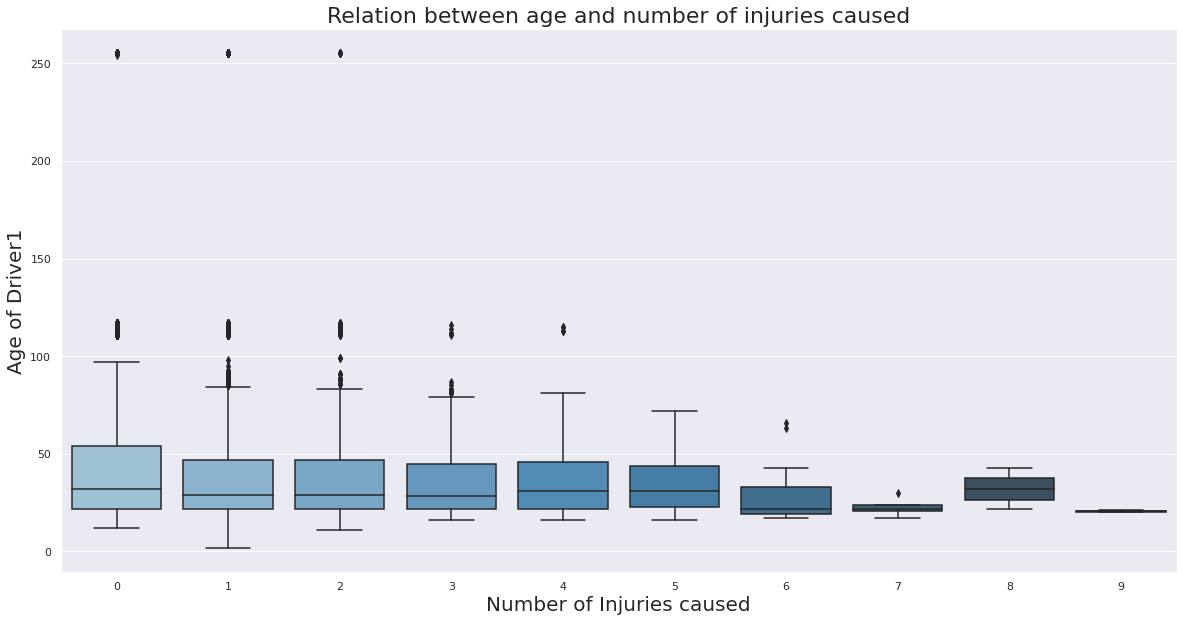

In [101]:
plt.figure(figsize=(20, 10))

p = sns.boxplot(x=df.Totalinjuries, y=df.Age_Drv1, palette="Blues_d")
p.set_xlabel("Number of Injuries caused", fontsize=20)
p.set_ylabel("Age of Driver1", fontsize=20)
p.set_title("Relation between age and number of injuries caused", fontsize=22)

Text(0.5, 1.0, 'Relation between age and number of injuries caused')

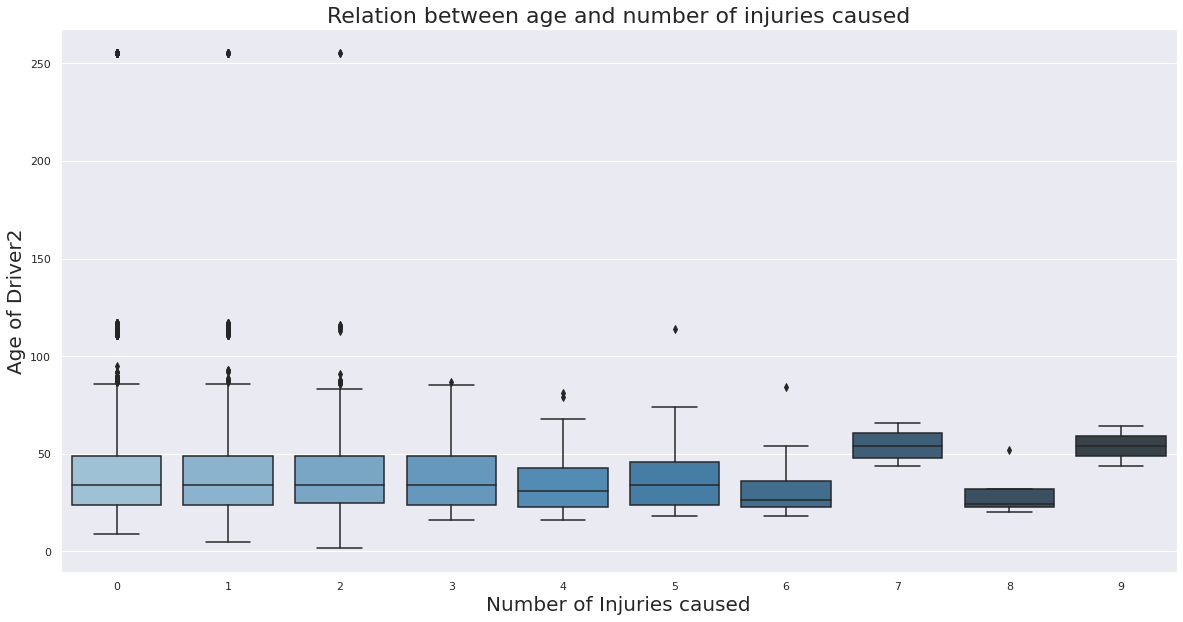

In [100]:
plt.figure(figsize=(20, 10))

p = sns.boxplot(x=df.Totalinjuries, y=df.Age_Drv2, palette="Blues_d")
p.set_xlabel("Number of Injuries caused", fontsize=20)
p.set_ylabel("Age of Driver2", fontsize=20)
p.set_title("Relation between age and number of injuries caused", fontsize=22)

In [109]:
df.sample(n=2800, random_state=1).reset_index(drop=True)

,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,2756425,8/2/13 18:16,2013,Priest Dr,Warner Rd,-89.760,Intersection Related Non Interchange,0,0,No Injury,Rear End,Daylight,Clear,Dry,Driver,34.0,Male,North,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,22.0,Male,North,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.334276,-111.963104
1,3020804,10/17/15 15:46,2015,Lemon St,Terrace Rd,-204.864,Unknown Non Interchange,1,0,Possible Injury,Head On,Daylight,Clear,Dry,Driver,20.0,Female,Northwest,Making Left Turn,Unknown,No Apparent Influence,No Apparent Influence,Driver,36.0,Male,West,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,33.416769,-111.923076
2,3170263,12/1/16 14:53,2016,Guadalupe Rd,Lakeshore Dr,-34.848,Intersection Related Non Interchange,1,0,Non Incapacitating Injury,Rear End,Daylight,Clear,Dry,Driver,21.0,Male,East,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,22.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.363756,-111.920017
3,2853321,6/14/14 10:11,2014,Price Rd,University Dr,0.000,Intersection Interchange,0,0,No Injury,Sideswipe Same Direction,Daylight,Clear,Dry,Driver,40.0,Male,Northwest,Changing Lanes,Other,No Apparent Influence,No Apparent Influence,Driver,35.0,Female,North,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.422011,-111.890296
4,2674018,10/8/12 13:25,2012,6th St,College Ave,-308.880,Not Junction Related,0,0,No Injury,Other,Daylight,Clear,Dry,Driver,19.0,Male,North,Backing,Inattention Distraction,No Apparent Influence,No Apparent Influence,Driver,23.0,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.424359,-111.935978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,3255239,7/8/17 16:21,2017,Southern Ave,Rural Rd,0.000,Intersection Non Interchange,2,1,Fatal,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,West,Making Left Turn,Failed To Yield Right Of Way,Alcohol,No Apparent Influence,Driver,87.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.392956,-111.926315
2796,2886050,9/30/14 11:25,2014,University Dr,College Ave,319.968,Not Junction Related,0,0,No Injury,Rear End,Daylight,Clear,Dry,Driver,47.0,Male,West,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,27.0,Female,West,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.421961,-111.933907
2797,2641876,7/7/12 12:14,2012,Elliot Rd,River Pkwy,0.000,Intersection Interchange,1,0,Possible Injury,Left Turn,Daylight,Clear,Dry,Driver,27.0,Female,East,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,Driver,32.0,Female,North,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.349273,-111.897895
2798,2694386,2/6/13 16:27,2013,College Ave,14th St,0.000,Intersection Non Interchange,0,0,No Injury,ANGLE (Front To Side)(Other Than Left Turn),Daylight,Clear,Dry,Driver,21.0,Female,East,Going Straight Ahead,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,Driver,54.0,Male,North,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.413536,-111.934921


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


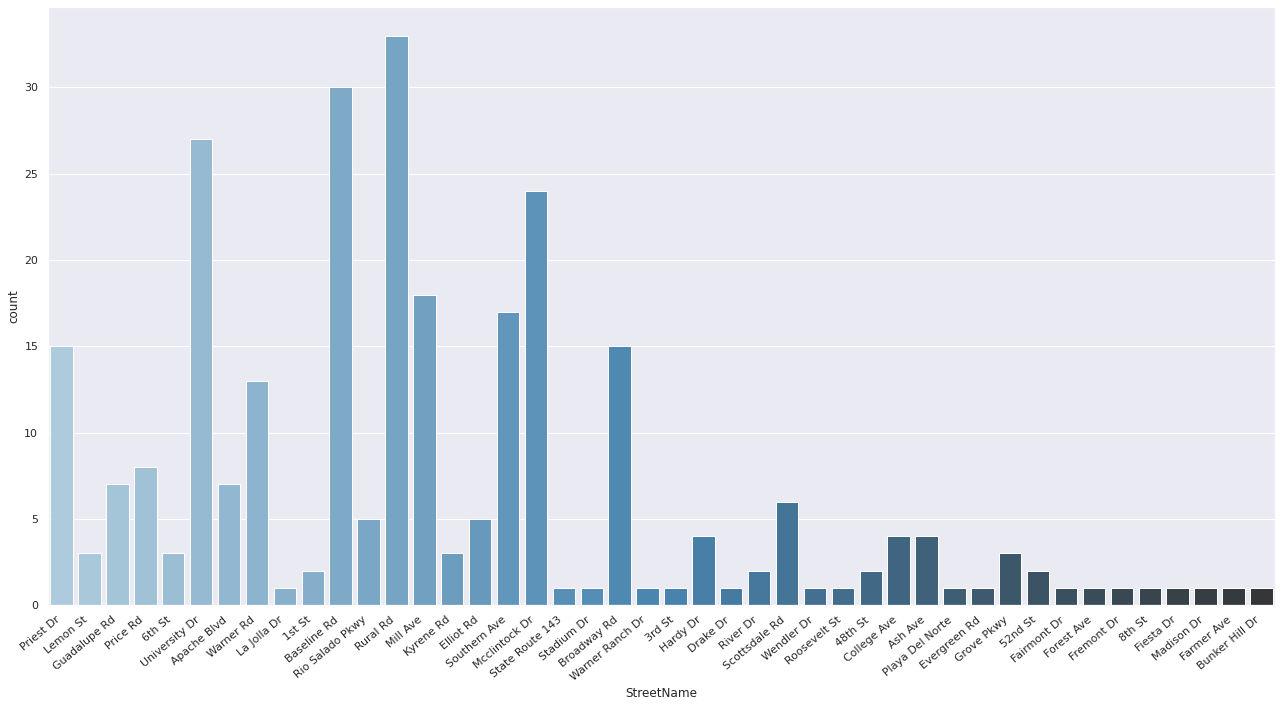

### Correlation between variables

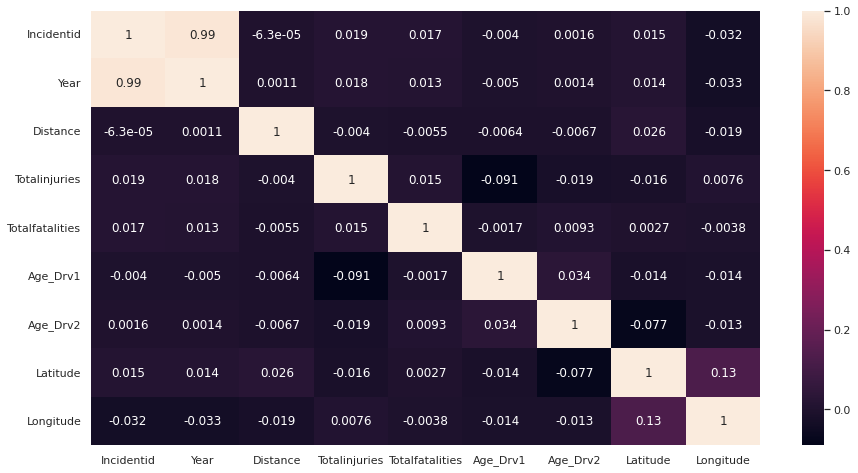

In [125]:
plt.figure(figsize=(15,8))

sns.heatmap(df.corr(), annot=True)